<a href="https://colab.research.google.com/github/crispianm/MDM3-UKCRIC/blob/main/TestingDNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
import pandas as pd
import os 
import sys
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import preprocessing


In [2]:
#file = open('SingleSidedAmplitudeSpectrum_labelled.csv')
#file = open('LabelledMatrixTimeDomain.csv')

data = pd.read_csv("./data/data.csv")

# data['binary_order'] = data['track_number']%10
order = data['track_number']/data['total_tracks']


labels = order #data['binary_order']

columns_to_remove = ['Unnamed: 0',
                    'id',
                    'track_title',
                    'album_title',
                    'album_artist',
                    'track_number',
                    'total_tracks',
                    'order',
                    'loudness',
                    'binary_order']

data.drop(columns = columns_to_remove, axis = 1, inplace = True)

data



,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.788,0.616,9,0,0.0337,0.00286,0.549000,0.0952,0.6960,119.037,275387,4
1,0.712,0.500,9,0,0.0338,0.82500,0.314000,0.1060,0.6820,90.039,322147,4
2,0.740,0.682,9,0,0.0504,0.06920,0.530000,0.3810,0.4100,113.201,544627,4
3,0.702,0.297,10,0,0.0317,0.89400,0.485000,0.1030,0.0676,110.116,228507,4
4,0.775,0.585,10,0,0.0271,0.04220,0.619000,0.0770,0.5180,109.942,337560,4
...,...,...,...,...,...,...,...,...,...,...,...,...
4971,0.530,0.275,2,0,0.0349,0.46000,0.000011,0.0729,0.0698,133.973,271907,4
4972,0.490,0.495,4,0,0.0338,0.17300,0.000000,0.0794,0.2300,148.967,263667,4
4973,0.767,0.355,11,1,0.0445,0.14600,0.000000,0.2980,0.2880,119.992,161893,4
4974,0.743,0.379,1,1,0.0784,0.20700,0.196000,0.1110,0.1830,127.030,412942,4


In [3]:
training_set, test_set, training_labels, test_labels = train_test_split(data, labels, test_size=0.25, random_state=42)

num_classes = len(np.unique(training_labels))

In [4]:
training_labels_categorical = to_categorical(training_labels)
test_labels_categorical = to_categorical(test_labels)
print(training_labels_categorical[0])

[1. 0.]


In [5]:
model = Sequential()
num_features = training_set.shape[1]
model.add(Dense(128, input_dim = num_features, activation='relu'))
model.add(Dense(64, activation='relu'))

# model.add(Conv1D(filters=32, kernel_size=5, padding='same', activation='relu', input_dim = num_features))
# model.add(MaxPooling1D(pool_size=2))

# model.add(Conv1D(filters=64, kernel_size=5, padding='same', activation='relu', input_dim = num_features))
# model.add(MaxPooling1D(pool_size=2))


model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate = 0.001), metrics=['accuracy'])

history = model.fit(training_set, training_labels_categorical, epochs=20) 

Epoch 1/20


ValueError: in user code:

    C:\Users\crisp\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    C:\Users\crisp\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\crisp\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\crisp\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\crisp\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\crisp\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    C:\Users\crisp\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:796 train_step
        loss = self.compiled_loss(
    C:\Users\crisp\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\crisp\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\losses.py:155 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\crisp\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\losses.py:259 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\crisp\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\crisp\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\losses.py:1643 categorical_crossentropy
        return backend.categorical_crossentropy(
    C:\Users\crisp\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\crisp\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\backend.py:4862 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\crisp\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\framework\tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 2) and (None, 338) are incompatible


In [ ]:
loss, accuracy = model.evaluate(test_set, test_labels_categorical)

39/39 [==============================] - 0s 3ms/step - loss: 6.7835 - accuracy: 0.1061


Text(0, 0.5, 'loss')

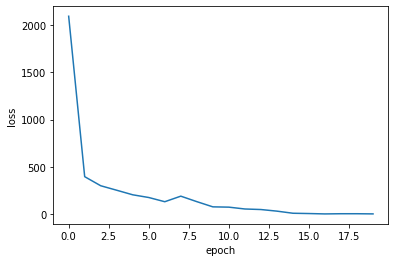

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

In [6]:
X = data.values
Y = labels.values

In [7]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)


(3483, 12) (746, 12) (747, 12) (3483,) (746,) (747,)


In [8]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(12,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])


In [9]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=20,
          validation_data=(X_val, Y_val))

Epoch 1/20
109/109 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.0385 - val_loss: 0.6929 - val_accuracy: 0.0214
Epoch 2/20
109/109 [==============================] - 0s 4ms/step - loss: 0.6924 - accuracy: 0.0388 - val_loss: 0.6929 - val_accuracy: 0.0214
Epoch 3/20
109/109 [==============================] - 0s 4ms/step - loss: 0.6923 - accuracy: 0.0385 - val_loss: 0.6928 - val_accuracy: 0.0228
Epoch 4/20
109/109 [==============================] - 0s 4ms/step - loss: 0.6922 - accuracy: 0.0396 - val_loss: 0.6927 - val_accuracy: 0.0214
Epoch 5/20
109/109 [==============================] - 0s 4ms/step - loss: 0.6921 - accuracy: 0.0402 - val_loss: 0.6926 - val_accuracy: 0.0214
Epoch 6/20
109/109 [==============================] - 1s 5ms/step - loss: 0.6920 - accuracy: 0.0382 - val_loss: 0.6927 - val_accuracy: 0.0241
Epoch 7/20
109/109 [==============================] - 0s 5ms/step - loss: 0.6920 - accuracy: 0.0385 - val_loss: 0.6927 - val_accuracy: 0.0268
Epoch 

In [12]:
model.evaluate(X_test, Y_test)[1]


24/24 [==============================] - 0s 4ms/step - loss: 0.6920 - accuracy: 0.0268


0.026773761957883835

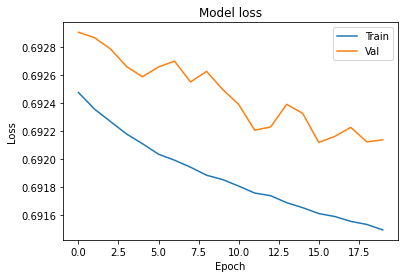

In [13]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [14]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(12,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=20,
          validation_data=(X_val, Y_val))

Epoch 1/20
109/109 [==============================] - 2s 12ms/step - loss: 0.6942 - accuracy: 0.0347 - val_loss: 0.6940 - val_accuracy: 0.0456
Epoch 2/20
109/109 [==============================] - 1s 10ms/step - loss: 0.6934 - accuracy: 0.0373 - val_loss: 0.6936 - val_accuracy: 0.0469
Epoch 3/20
109/109 [==============================] - 1s 10ms/step - loss: 0.6929 - accuracy: 0.0411 - val_loss: 0.6927 - val_accuracy: 0.0201
Epoch 4/20
109/109 [==============================] - 1s 11ms/step - loss: 0.6931 - accuracy: 0.0399 - val_loss: 0.6920 - val_accuracy: 0.0188
Epoch 5/20
109/109 [==============================] - 1s 10ms/step - loss: 0.6923 - accuracy: 0.0442 - val_loss: 0.6895 - val_accuracy: 0.0241
Epoch 6/20
109/109 [==============================] - 1s 10ms/step - loss: 0.6918 - accuracy: 0.0347 - val_loss: 0.6917 - val_accuracy: 0.0228
Epoch 7/20
109/109 [==============================] - 1s 10ms/step - loss: 0.6918 - accuracy: 0.0413 - val_loss: 0.6898 - val_accuracy: 0.0188

In [15]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(12,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=20,
          validation_data=(X_val, Y_val))

Epoch 1/20
109/109 [==============================] - 2s 11ms/step - loss: 4.9917 - accuracy: 0.0465 - val_loss: 0.6945 - val_accuracy: 0.0000e+00
Epoch 2/20
109/109 [==============================] - 2s 14ms/step - loss: 0.6934 - accuracy: 0.0238 - val_loss: 0.6936 - val_accuracy: 0.0469
Epoch 3/20
109/109 [==============================] - 1s 7ms/step - loss: 0.6932 - accuracy: 0.0566 - val_loss: 0.6930 - val_accuracy: 0.0000e+00
Epoch 4/20
109/109 [==============================] - 1s 8ms/step - loss: 0.6932 - accuracy: 0.0281 - val_loss: 0.6932 - val_accuracy: 0.0469
Epoch 5/20
109/109 [==============================] - 1s 8ms/step - loss: 0.6932 - accuracy: 0.0528 - val_loss: 0.6931 - val_accuracy: 0.0000e+00
Epoch 6/20
109/109 [==============================] - 1s 8ms/step - loss: 0.6932 - accuracy: 0.0422 - val_loss: 0.6932 - val_accuracy: 0.0469
Epoch 7/20
109/109 [==============================] - 2s 17ms/step - loss: 0.6932 - accuracy: 0.0629 - val_loss: 0.6932 - val_accuracy